In [2]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import seaborn as sns
# import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

In [3]:
 #Import and read the heart.csv.
heart = pd.read_csv("data.csv")
heart
#Replacing strings with numbers:  creating a dict file 
gender = {'M': 1,'F': 0}
heart.Sex = [gender[item] for item in heart.Sex]
ex_angina={'N': 0,'Y': 1}
heart.ExerciseAngina = [ex_angina[item] for item in heart.ExerciseAngina]
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [4]:
heart.dtypes

Age                 int64
Sex                 int64
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
heart.shape

(918, 12)

In [6]:
#Display statistical description of the features
heart.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.396514,198.799564,0.233115,136.809368,0.404139,0.887364,0.553377
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [9]:
#Display statistical description of the features
heart.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.396514,198.799564,0.233115,136.809368,0.404139,0.887364,0.553377
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [10]:
#styled describe
heart.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
Sex,918.000000,0.789760,0.407701,0.000000,1.000000,1.000000,1.000000,1.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
ExerciseAngina,918.000000,0.404139,0.490992,0.000000,0.000000,0.000000,1.000000,1.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000


Data Preprocessing and Cleaning


In [7]:
#cleaning the dataset by removing all zeroes in the column "cholesterol" as there is no 0 cholesterole.
clean_df = heart[heart['Cholesterol'] !=0]
clean_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,0,0.0,Flat,1


In [12]:
# There were 390 patients with < 50% diameter narrowing of arteries, and 356 patients with  > 50% diameter narrowing of arteries [ 1 = heart disease, 0 - no heart disease]
clean_df['HeartDisease'].value_counts()

0    390
1    356
Name: HeartDisease, dtype: int64

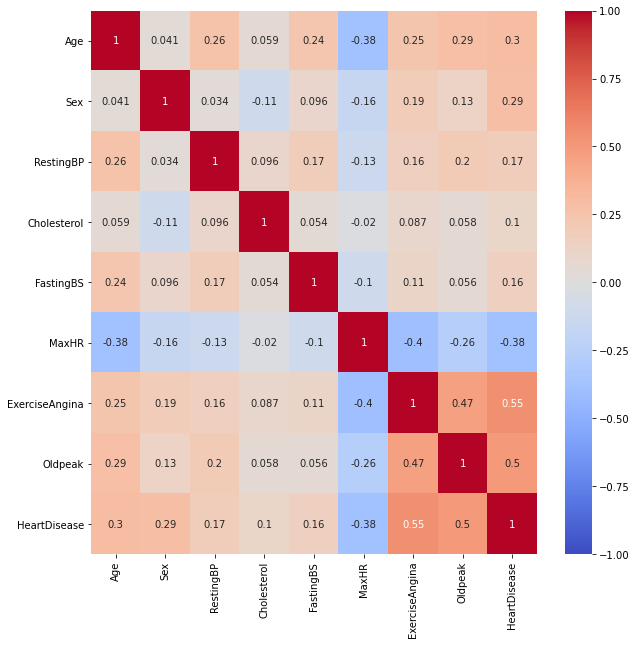

In [13]:
#Correlation Heatmap between the variables
corr = clean_df.corr()
ax, fig = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [14]:
# Project only necessary columns and separate target feature for training data
projected_df = clean_df[['Age', 'Sex', 'Cholesterol', 'Oldpeak', 'MaxHR', 'ExerciseAngina', 'HeartDisease']]
# cholesterol_df = clean_df[['Cholesterol', 'HeartDisease']]
# cholesterol_df.head()
projected_df

,Age,Sex,Cholesterol,Oldpeak,MaxHR,ExerciseAngina,HeartDisease
0,40,1,289,0.0,172,0,0
1,49,0,180,1.0,156,0,1
2,37,1,283,0.0,98,0,0
3,48,0,214,1.5,108,1,1
4,54,1,195,0.0,122,0,0
...,...,...,...,...,...,...,...
913,45,1,264,1.2,132,0,1
914,68,1,193,3.4,141,0,1
915,57,1,131,1.2,115,1,1
916,57,0,236,0.0,174,0,1


[0.16380558 0.05742267 0.17118059 0.16535676 0.19774012 0.24449427]


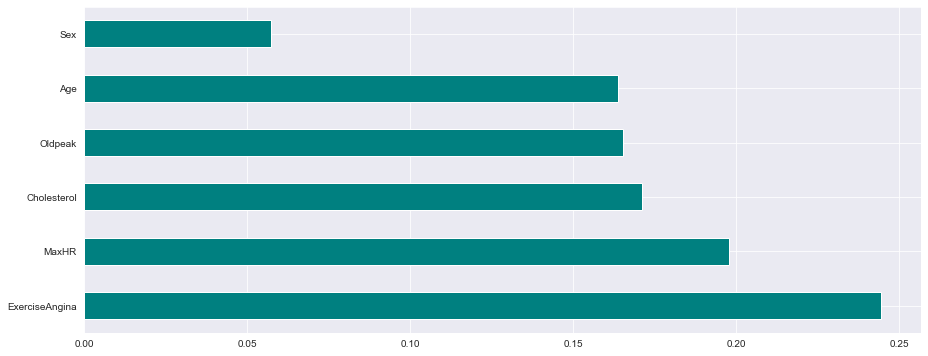

In [15]:
# Feature Selection
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
x = projected_df.iloc[:, :-1]
y = projected_df.iloc[:,-1]

#research it

from sklearn.ensemble import ExtraTreesClassifier
# import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(7).plot(kind='barh', color='teal')
plt.show()

Explain HR on Heart Disease

In [16]:
# Project only MaxHR column and separate target feature for training data
maxhr_df = clean_df[['MaxHR', 'HeartDisease']]
maxhr_df 

,MaxHR,HeartDisease
0,172,0
1,156,1
2,98,0
3,108,1
4,122,0
...,...,...
913,132,1
914,141,1
915,115,1
916,174,1


In [17]:
#Load dataset
# Split the dataframe into data and target["HeartDisease"]
X = maxhr_df.drop('HeartDisease', axis=1)
y = maxhr_df['HeartDisease'].values


In [19]:
# split our data into training and data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
# Encode the target column with 1s and 0s (both train and test)
X_test = X_test[X_train.columns]
target_encoder = LabelEncoder().fit(y_train)
y_train = target_encoder.transform(y_train)
y_test = target_encoder.transform(y_test)
y_test

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [21]:
# Check the shapes to make sure X_train and X_test have the same number of columns (same with y_train/y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(559, 1)
(187, 1)
(559,)
(187,)


In [26]:

lr = LogisticRegression(solver='lbfgs', random_state=25)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))

0.679144385026738
0.6529516994633273


In [27]:
# Create a scaler based on the X_train data
scaler = StandardScaler().fit(X_train)

# Use the scaler on X_train and X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
lr.fit(X_train_scaled, y_train)
print(lr.score(X_test_scaled, y_test))
print(lr.score(X_train_scaled, y_train))

0.679144385026738
0.6529516994633273


In [29]:
from sklearn.cluster import KMeans

In [30]:
model = KMeans(n_clusters=3, random_state=5)

In [33]:
model.fit(projected_df)

KMeans(n_clusters=3, random_state=5)

In [34]:
predictions = model.predict(projected_df)
print(predictions)

[0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 2 1 2 1 1 1 1 0 0
 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 2 0 0 0 1 0 1 0 0 1 0 2 0 1 1 1
 0 1 2 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 2 2 1 0 0 1 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 1 2 1 0 1 1 1 1 0 1 2 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0
 1 2 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 2 1 0
 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0
 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 2 1 0 1 0 0 0 1 1 0 1 0 2 0 0 0 0 0 2 1 1
 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 2 1 1 1 0 1 1 0 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 2 1 2
 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1
 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 2 1
 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 2 0 0
 2 0 0 0 1 0 1 0 2 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 

In [47]:
# khr = maxhr_df.copy()
# khr["class"] = model.labels_
# khr.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

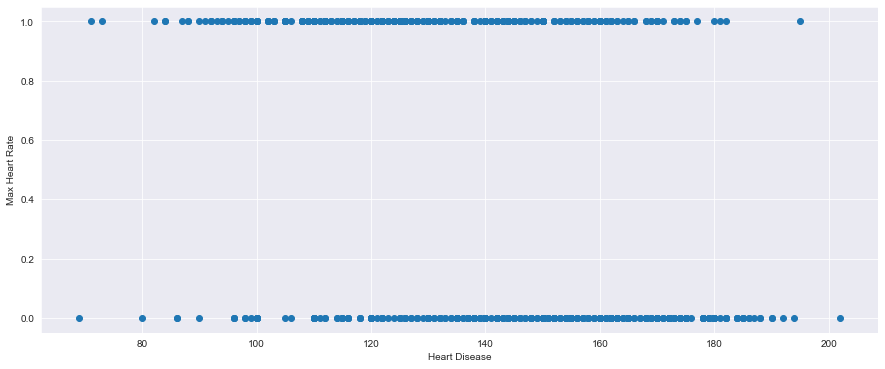

In [53]:
plt.scatter(x=projected_df["MaxHR"], y= projected_df['HeartDisease'])
plt.xlabel('Heart Disease')
plt.ylabel('Max Heart Rate')
plt.show()

In [54]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [55]:
steps1 = [('scaler', StandardScaler()), 
         ('svm', SVC())]

In [56]:
pipe1 = Pipeline(steps1)
pipe1.fit(X_train, y_train)
pipe1.score(X_test, y_test)

0.6524064171122995

In [8]:
clean_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [20]:
# Project only MaxHR column with Cholesterol and Restinghr and separate target feature for training data
factors_df = clean_df[['RestingBP', 'Cholesterol','MaxHR', 'HeartDisease']]
factors_df 

,RestingBP,Cholesterol,MaxHR,HeartDisease
0,140,289,172,0
1,160,180,156,1
2,130,283,98,0
3,138,214,108,1
4,150,195,122,0
...,...,...,...,...
913,110,264,132,1
914,144,193,141,1
915,130,131,115,1
916,130,236,174,1


In [21]:
X = factors_df.drop('HeartDisease', axis=1)
y = factors_df['HeartDisease'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
# Encode the target column with 1s and 0s (both train and test)
X_test = X_test[X_train.columns]
target_encoder = LabelEncoder().fit(y_train)
y_train = target_encoder.transform(y_train)
y_test = target_encoder.transform(y_test)
y_test

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [24]:

lr = LogisticRegression(solver='lbfgs', random_state=25)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))

0.679144385026738
0.6815742397137746
